In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [11]:
salary_data_test = pd.read_csv("SalaryData_Test.csv")
salary_data_train = pd.read_csv("SalaryData_Train.csv")

In [12]:
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [13]:
salary_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [14]:
cols = ['age', 'workclass', 'education', 'educationno', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'capitalgain','capitalloss', 'hoursperweek', 'native', 'Salary']
cols

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [15]:
salary_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [16]:
print(salary_data_test.shape)
print(salary_data_train.shape)

(15060, 14)
(30161, 14)


In [17]:
# to perform classification first we'll be converting salary column to categorical feature of high and low
# new column is added to the dataframe
# for i in salary_data_test.Salary:
for i in salary_data_test.Salary:

    if i == " <=50K" :
        salary_data_test["Salary"] = salary_data_test["Salary"].replace([" <=50K"], "Low")
    elif i ==" >50K":
        salary_data_test["Salary"] = salary_data_test["Salary"].replace([" >50K"], "High")
        

for i in salary_data_train.Salary:

    if i == " <=50K" :
        salary_data_train["Salary"] = salary_data_train["Salary"].replace([" <=50K"], "Low")
    elif i ==" >50K":
        salary_data_train["Salary"] = salary_data_train["Salary"].replace([" >50K"], "High")

In [18]:
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,Low
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,Low
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,High
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,High
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,Low
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,Low
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,Low
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,Low


## **Exploratory Data Analysis**

### **Both train and test datasets are same! so, we perform EDA on train Data**

In [19]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values

features_with_na=[features for features in salary_data_test.columns if salary_data_test[features].isnull().sum()>1] #list comprehension use

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(salary_data_test[feature].isnull().mean(), 4),  ' % missing values')

## No missing values in the given dataset

## **Numerical Variables**

In [20]:

numerical_features = [feature for feature in salary_data_test.columns if salary_data_test[feature].dtypes != 'O'] # list comprehension feature that are not equal to object type

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
salary_data_test[numerical_features].head()

Number of numerical variables:  5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30


## **Discrete Variables**

In [21]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(salary_data_test[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 1
['educationno']


## **Continous variable**

In [22]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 4
['age', 'capitalgain', 'capitalloss', 'hoursperweek']


In [23]:
categorical_features=[feature for feature in salary_data_test.columns if salary_data_test[feature].dtypes=='O']
categorical_features

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [24]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(salary_data_test[feature].unique())))

The feature is workclass and number of categories are 7
The feature is education and number of categories are 16
The feature is maritalstatus and number of categories are 7
The feature is occupation and number of categories are 14
The feature is relationship and number of categories are 6
The feature is race and number of categories are 5
The feature is sex and number of categories are 2
The feature is native and number of categories are 40
The feature is Salary and number of categories are 2


### **Number of labels: cardinality**
### The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is ### known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check ### for high cardinality

In [25]:
# check for cardinality in categorical variables

for var in categorical_features:
    
    print(var, ' contains ', len(salary_data_test[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [26]:
df = salary_data_test[categorical_features]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   workclass      15060 non-null  object
 1   education      15060 non-null  object
 2   maritalstatus  15060 non-null  object
 3   occupation     15060 non-null  object
 4   relationship   15060 non-null  object
 5   race           15060 non-null  object
 6   sex            15060 non-null  object
 7   native         15060 non-null  object
 8   Salary         15060 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


## **Label Encoding**

In [27]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()



In [28]:

for i in categorical_features: #label Encoding of test data
    salary_data_test[i] = label_encoder.fit_transform(salary_data_test[i])
    
    
for i in categorical_features: #label encoding of train data
    salary_data_train[i] = label_encoder.fit_transform(salary_data_train[i])

In [29]:
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,1
1,38,2,11,9,2,4,0,4,1,0,0,50,37,1
2,28,1,7,12,2,10,0,4,1,0,0,40,37,0
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,0
4,34,2,0,6,4,7,1,4,1,0,0,30,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,1
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,1
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,1
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,1


In [30]:
salary_data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,1
1,50,4,9,13,2,3,0,4,1,0,0,13,37,1
2,38,2,11,9,0,5,1,4,1,0,0,40,37,1
3,53,2,1,7,2,5,0,2,1,0,0,40,37,1
4,28,2,9,13,2,9,5,2,0,0,0,40,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,1
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,1
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,1


In [31]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

salary_data_train = scaler.fit_transform(salary_data_train)

salary_data_test = scaler.transform(salary_data_test)

In [34]:
salary_data_train = pd.DataFrame(salary_data_train, columns=[cols])
salary_data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.105263,3.0,-0.666667,0.75,1.0,-0.857143,0.000000,0.0,0.0,2174.0,0.0,0.0,0.0,0.0
1,0.684211,2.0,-0.666667,0.75,0.0,-0.428571,-0.333333,0.0,0.0,0.0,0.0,-5.4,0.0,0.0
2,0.052632,0.0,0.000000,-0.25,-1.0,-0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842105,0.0,-3.333333,-0.75,0.0,-0.142857,-0.333333,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,0.0,-0.666667,0.75,0.0,0.428571,1.333333,-2.0,-1.0,0.0,0.0,0.0,-33.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.526316,0.0,-1.333333,0.50,0.0,0.857143,1.333333,0.0,-1.0,0.0,0.0,-0.4,0.0,0.0
30157,0.157895,0.0,0.000000,-0.25,0.0,0.000000,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
30158,1.105263,0.0,0.000000,-0.25,2.0,-0.857143,1.000000,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
30159,-0.789474,0.0,0.000000,-0.25,1.0,-0.857143,0.666667,0.0,0.0,0.0,0.0,-4.0,0.0,0.0


In [35]:
salary_data_test = pd.DataFrame(salary_data_test, columns=[cols])
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,-0.631579,0.0,-3.333333,-0.75,1.0,0.000000,0.666667,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.052632,0.0,0.000000,-0.25,0.0,-0.285714,-0.333333,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,-0.473684,-1.0,-1.333333,0.50,0.0,0.571429,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.368421,0.0,1.333333,0.00,0.0,0.000000,-0.333333,-2.0,0.0,7688.0,0.0,0.0,0.0,-1.0
4,-0.157895,0.0,-3.666667,-1.00,1.0,0.142857,0.000000,0.0,0.0,0.0,0.0,-2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.210526,0.0,-0.666667,0.75,1.0,0.428571,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15056,0.105263,0.0,-0.666667,0.75,-1.0,0.428571,0.000000,0.0,-1.0,0.0,0.0,-0.8,0.0,0.0
15057,0.052632,0.0,-0.666667,0.75,0.0,0.428571,-0.333333,0.0,0.0,0.0,0.0,2.0,0.0,0.0
15058,0.368421,0.0,-0.666667,0.75,-1.0,-0.857143,0.666667,-3.0,0.0,5455.0,0.0,0.0,0.0,0.0


## **Model Training**

In [39]:
salary_data_test.shape, salary_data_train.shape

((15060, 14), (30161, 14))

In [41]:
X = salary_data_train.drop(['Salary'], axis=1)

y = salary_data_train['Salary']

C:\Program Files\Python39\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [54]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [55]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [56]:
y_pred = gnb.predict(X_test)

y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7911


In [58]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7950


In [59]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7950
Test set score: 0.7911


In [60]:
# check class distribution in test set

y_test.value_counts()

(Salary,)
 0.0         6798
-1.0         2251
dtype: int64

In [61]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [62]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 691 1560]
 [ 330 6468]]

True Positives(TP) =  691

True Negatives(TN) =  6468

False Positives(FP) =  1560

False Negatives(FN) =  330


In [65]:
import seaborn as sns

<AxesSubplot:>

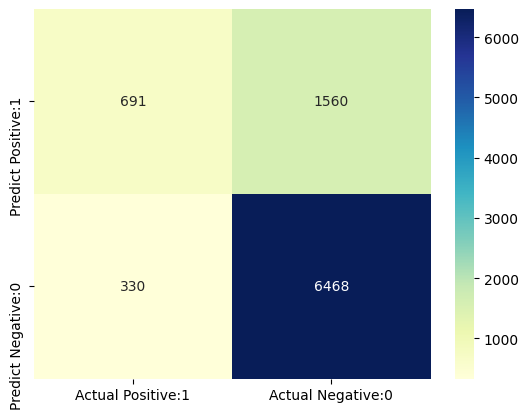

In [66]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.68      0.31      0.42      2251
         0.0       0.81      0.95      0.87      6798

    accuracy                           0.79      9049
   macro avg       0.74      0.63      0.65      9049
weighted avg       0.77      0.79      0.76      9049



## Classification accuracy

In [68]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [69]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7911


In [70]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2089


In [71]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.3070


In [72]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6768


In [73]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6768


In [74]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1943


In [75]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8057


In [76]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.71350702e-03, 9.98286493e-01],
       [2.71046868e-04, 9.99728953e-01],
       [6.59939364e-02, 9.34006064e-01],
       [4.15431438e-04, 9.99584569e-01],
       [1.33776964e-03, 9.98662230e-01],
       [1.36934759e-02, 9.86306524e-01],
       [9.99999426e-01, 5.74003148e-07],
       [1.13314917e-01, 8.86685083e-01],
       [6.05802201e-02, 9.39419780e-01],
       [2.09460230e-03, 9.97905398e-01]])

In [77]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.001714,9.982865e-01
1,0.000271,9.997290e-01
2,0.065994,9.340061e-01
3,0.000415,9.995846e-01
4,0.001338,9.986622e-01
5,0.013693,9.863065e-01
6,0.999999,5.740031e-07
7,0.113315,8.866851e-01
8,0.060580,9.394198e-01
9,0.002095,9.979054e-01


In [78]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([9.98286493e-01, 9.99728953e-01, 9.34006064e-01, 9.99584569e-01,
       9.98662230e-01, 9.86306524e-01, 5.74003148e-07, 8.86685083e-01,
       9.39419780e-01, 9.97905398e-01])

In [79]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

In [81]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

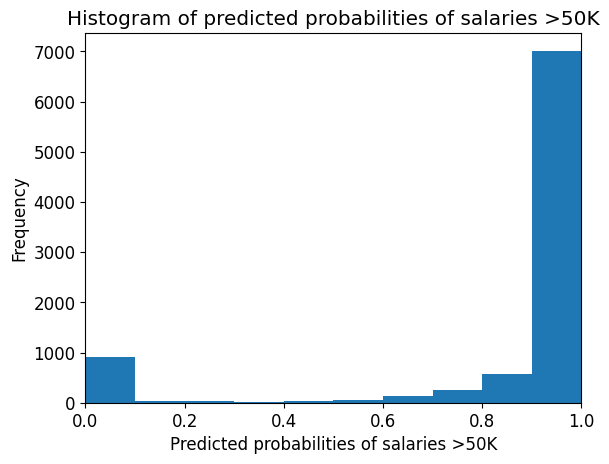

In [82]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [85]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8489


In [87]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8499


C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

## **k-Fold Cross Validation**

In [89]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

Cross-validation scores:[0.80160985 0.79024621 0.77972525 0.79677878 0.7977262  0.79393652
 0.80483183 0.79914732 0.79062056 0.79583136]


C:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [90]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7950
